# Звіт з лабораторної роботи №5

Виконав студент групи КН-24-1 Озівський В. В.

Тема: Алгоритми пошуку
\
Мета: засвоїти варіанти реалізації алгоритмів пошуку засобами Python і методи оцінювання їх складності.

### <center>Хід роботи</center>

Лінійний пошук.
\
Одним з найпростіших алгоритмів пошуку є лінійний пошук. Сенс алгоритму полягає в тому, що пошук починають з першого елемента масиву. Якщо поточний елемент списку не дорівнює шуканому значенню, то здійснюється перехід до наступного елемента. Отже, унаслідок кожної перевірки сфера пошуку зменшується на один елемент.

In [1]:
# Якщо елемент не буде знайдено, виводиться -1
def linear_search(a_list, x):
    i, length = 0, len(a_list)
    while i < length and x != a_list[i]:
        i += 1
    return i if i < length else -1 


In [2]:
search_item = int(input("Введіть шуканий елемент: "))

Введіть шуканий елемент:  7


In [3]:
a = [32, 1, 3, 4, 2, 1]
linear_search(a, search_item)

-1

Бінарний пошук.
\
Це класичний алгоритм пошуку елемента у відсортованому списку, який використовує поділ масиву на половини. Алгоритм можна реалізувати рекурсивно. 

In [4]:
def bin_search(a_list, x, left, right):
    if left > right or len(a_list) == 0:
        return -1
    middle = (left + right) // 2
    if a_list[middle] == x:
        return middle
    elif (a_list[middle] < x):
        return bin_search(a_list, x, middle + 1, right)
    else: # a_list[middle] > x
        return bin_search(a_list, x, left, middle - 1)

In [5]:
a = range(7,21)

In [6]:
search_item = int(input("Введіть шуканий елемент: "))

Введіть шуканий елемент:  5


In [7]:
bin_search(a, search_item, 0, len(a) - 1)

-1

## Завдання для самостійної роботи:

1. Оцінити асимптотичну складність алгоритму лінійного пошуку:
\
У лінійному пошуку в найгіршому випадку потрібно переглянути всі елементи масиву.
\
Отже, асимптотична складність у найгіршому випадку: $O(n)$

2. Оцінити асимптотичну складність алгоритму бінарного пошуку:
\
У бінарному пошуку на кожному кроці ми ділимо масив навпіл.
\
Кількість кроків — приблизно $log_2 n$
\
Отже, асимптотична складність у найгіршому випадку: O(log n)

3. Написати функцію, яка б могла повертати датафрейм з таким складом  полів: («n», «time»), де n – розмір масиву для функції linear_searh(); 
\
Написати функцію, яка б могла повертати датафрейм з таким складом  полів: («n», «time»), де n – розмір масиву для функції bin_searh(); 

In [11]:
import time
import pandas as pd
import numpy as np

# Лінійний пошук
def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1

# Бінарний пошук
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    while left <= right:
        mid = (left + right) // 2
        if arr[mid] == target:
            return mid
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1
    return -1

# Функція для вимірювання часу лінійного пошуку
def measure_linear_search():
    n_values = []
    times = []

    for n in range(1000, 10001, 1000):
        arr = np.random.randint(0, n*10, size=n)
        target = arr[-1]  # Найгірший випадок

        start_time = time.time()
        linear_search(arr, target)
        end_time = time.time()

        n_values.append(n)
        times.append(end_time - start_time)

    return pd.DataFrame({'n': n_values, 'time': times})

# Функція для вимірювання часу бінарного пошуку
def measure_binary_search():
    n_values = []
    times = []

    for n in range(1000, 10001, 1000):
        arr = np.sort(np.random.randint(0, n*10, size=n))
        target = arr[-1]

        start_time = time.time()
        binary_search(arr, target)
        end_time = time.time()

        n_values.append(n)
        times.append(end_time - start_time)

    return pd.DataFrame({'n': n_values, 'time': times})
    

4. За результатами попередніх завдань побудувати графіки залежності часу виконання процедури пошуку від розміру масиву. 

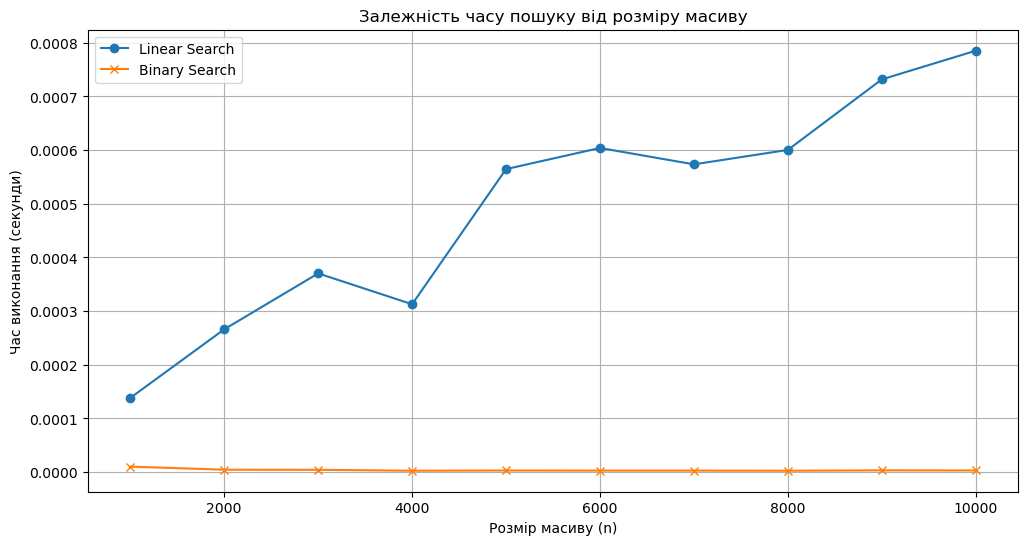

In [16]:
import matplotlib.pyplot as plt

# Збираємо дані
df_linear = measure_linear_search()
df_binary = measure_binary_search()

# Будуємо графіки
plt.figure(figsize=(12, 6))

plt.plot(df_linear['n'], df_linear['time'], label='Linear Search', marker='o')
plt.plot(df_binary['n'], df_binary['time'], label='Binary Search', marker='x')

plt.xlabel('Розмір масиву (n)')
plt.ylabel('Час виконання (секунди)')
plt.title('Залежність часу пошуку від розміру масиву')
plt.legend()
plt.grid(True)
plt.show()


### Відповіді на контрольні питання

1. Сформулювати задачу пошуку:
\
Знайти елемент у заданій множині або визначити його відсутність.

2. Критерії оцінювання ефективності алгоритмів пошуку:
- Часова складність (швидкість роботи).
- Просторова складність (пам'ять).
- Стабільність результату.

3. Лінійний пошук і його асимптотична складність:
\
Перевірка кожного елемента масиву послідовно; складність $O(n)$.

4. Бінарний пошук і головний принцип роботи:
\
Пошук у відсортованому масиві шляхом поділу його навпіл на кожному кроці; складність $O(log n)$.

5. Переваги і недоліки бінарного пошуку порівняно з лінійним:
\
Переваги: швидший на великих масивах.
\
Недоліки: вимагає попереднього сортування даних.

6. Інші алгоритми пошуку:
- Інтерполяційний пошук.
- Пошук за хеш-таблицею.
- Експоненційний пошук.
- Фібоначчі-пошук.
